In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [3]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project',
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

In [6]:
graph = model.fit(train_generator, epochs=25, validation_data=validation_generator)
graph

Epoch 1/25
162/162 [==============================] - 790s 5s/step - loss: 1.6418 - accuracy: 0.4804 - val_loss: 1.4443 - val_accuracy: 0.3870
Epoch 2/25
162/162 [==============================] - 686s 4s/step - loss: 1.2910 - accuracy: 0.5347 - val_loss: 1.8976 - val_accuracy: 0.4280
Epoch 3/25
162/162 [==============================] - 663s 4s/step - loss: 1.1289 - accuracy: 0.5811 - val_loss: 1.3987 - val_accuracy: 0.4977
Epoch 4/25
162/162 [==============================] - 662s 4s/step - loss: 1.0431 - accuracy: 0.6092 - val_loss: 1.3240 - val_accuracy: 0.4628
Epoch 5/25
162/162 [==============================] - 641s 4s/step - loss: 1.0012 - accuracy: 0.6063 - val_loss: 2.4689 - val_accuracy: 0.2477
Epoch 6/25
162/162 [==============================] - 592s 4s/step - loss: 0.9338 - accuracy: 0.6215 - val_loss: 1.5814 - val_accuracy: 0.4280
Epoch 7/25
162/162 [==============================] - 592s 4s/step - loss: 0.8942 - accuracy: 0.6455 - val_loss: 0.9660 - val_accuracy: 0.5844

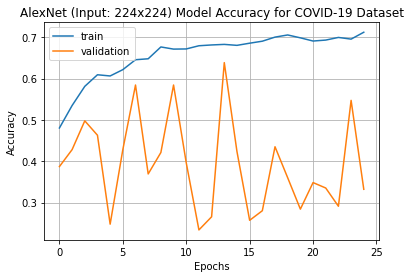

In [10]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('AlexNet (Input: 224x224) Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [9]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using Alexnet Model with input 224x224 is',max_acc*100)

The highest accuracy achieved using Alexnet Model with input 224x224 is 63.85449171066284
